In [1]:
import healpy as hp
import numpy as np

from astropaint import Canvas
from astropaint.lib import utils

In [2]:
def get_alm_from_array(array, lmax, l, m):
    def get_index(lmax, l, m):
        if m > 0:
            index = sum([lmax - i + 1 for i in range(m)]) + (l - m)
            return index
        elif m >l:
            return "invalid input: m>l"
        else:
            return l
    index = get_index(lmax, l, m)
    return array[index]

In [3]:
temp_array = hp.fitsfunc.read_map('COM_CMB_IQU-smica_2048_R3.00full.fits')

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/Users/zhaozihan/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:371: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


Ordering converted to RING


In [4]:
np.size(temp_array)

50331648

In [5]:
i = 0
while i < 20:
    print(temp_array[i])
    i += 1

-0.00012349987810011953
-9.279615187551826e-05
-6.396187382051721e-05
-0.00011684260243782774
-0.00017214436957146972
-0.00013405551726464182
-0.00011848884605569765
-8.676809375174344e-05
-4.7774075937923044e-05
-7.589544111397117e-05
-0.00012332074402365834
-0.0001748979848343879
-0.00020495901117101312
-0.00016862327174749225
-0.0001194820724776946
-0.00010631480108713731
-0.00010139055666513741
-7.015468145255e-05
-3.495065539027564e-05
-4.468834958970547e-05


In [6]:
alm_array = hp.map2alm(temp_array)

In [7]:
len(alm_array)

18877440

In [8]:
lmax = 0
while sum([lmax - i + 1 for i in range(lmax + 1)]) < len(alm_array):
    lmax += 1
lmax

6143

In [9]:
get_alm_from_array(alm_array, 6143, 2, 0)

(1.070185639949497e-05+0j)

In [10]:
get_alm_from_array(alm_array, 6143, 2, 1)

(-2.6997675124263577e-06+9.13671284184466e-06j)

In [11]:
get_alm_from_array(alm_array, 6143, 2, 2)

(-1.2314693034916324e-05-1.5048913403085205e-05j)

In [12]:
[-1.2314693034916324e-05+1.5048913403085205e-05j, -(-2.6997675124263577e-06-9.13671284184466e-06j),1.070185639949497e-05+0j,-2.6997675124263577e-06+9.13671284184466e-06j, -1.2314693034916324e-05-1.5048913403085205e-05j]

[(-1.2314693034916324e-05+1.5048913403085205e-05j),
 (2.6997675124263577e-06+9.13671284184466e-06j),
 (1.070185639949497e-05+0j),
 (-2.6997675124263577e-06+9.13671284184466e-06j),
 (-1.2314693034916324e-05-1.5048913403085205e-05j)]

/Users/zhaozihan/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/Users/zhaozihan/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


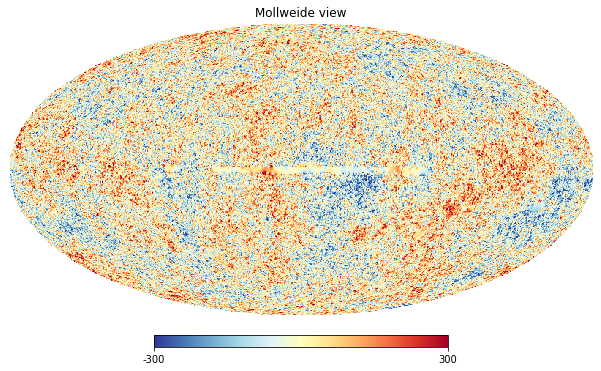

In [15]:
hp.mollview(1E6 * temp_array, min = -300, max = 300, cmap = cm.RdYlBu_r)

In [14]:
from matplotlib import cm

In [74]:
    def show_map(self,
                 projection="mollweide",
                 graticule=True,
                 *args,
                 **kwargs):

        self._viewer(self.pixels,
                     projection=projection,
                     #graticule=graticule,
                     *args,
                     **kwargs,
                     )
        #TODO: add min max args

In [ ]:
def _viewer(self,
                map_,
                projection="mollview",
                #graticule=True,
                min=None,
                max=None,
                *args,
                **kwargs):
        """
        wrapper for healpy visualization functions

        Returns
        -------
        None
        """

        # select healpy projection type (e.g. mollview, cartview)
        hp_viewer = self._proj_dict[projection]

        #if graticule: hp.graticule()

        hp_viewer(map_,
                  cmap=self.cmap,
                  min=min,
                  max=max,
                  *args,
                  **kwargs,
                  )